<a href="https://colab.research.google.com/github/mwelland/ENGPYHS_3NM4/blob/main/Finite_difference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Goal
* Understand the use and pitfalls of numerical differentiation
* Identify the forward, backward, and central finite difference methods
* Justify the use of certaint methods in terms of the order of the accuracy.

# Numerical differentiation

Numerical differentiation is a method to calculate the derivative of a function.

We have already approached this in the context of the *secant* search methods which approximate the tangent of the curve.

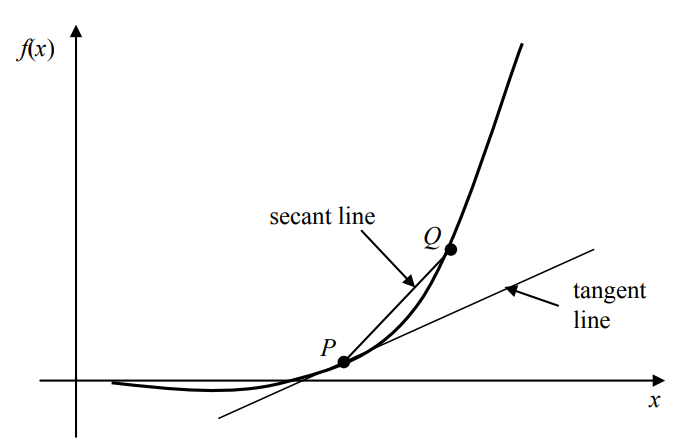

Note that the secant becomes the tangent when $Q \rightarrow P$. Most methods are characterized in terms of the *step size*, in this case the $x$ distance between P and Q.

This notion of the secant approaching the tangent  motivates the *forward difference* formula.


### Forward difference

The forward difference is so named because it starts at $x$ and looks *forward* to obtain derivative information.

Consider the Taylor expansion of $f(x)$ from a point $x_i$, with the step size $h$:


$$
\begin{align}
f(x+h) &= f(x) + f'(x) h + f''(x) \frac{h^2}{2} + f'''(x) \frac{h^3}{6}
\end{align}
$$

Consider truncating the series after the first two terms:

$$ f(x+h) = f(x) + f'(x) h + O(h^2)$$
and solve for
$$f'(x) = \frac{f(x+h) - f(x)}{h} +  O(h^2) $$


#### Example - Rocket velocity

A rocket has velocity:

$$v(t) = 2000 \ln \bigg[\frac{14 \times 10^4}{14 \times 10^4 - 2100t}\bigg] - 9.8 t$$

What is the acceleration as a function of $t$?

Analytically we can find,
$$a(t) = v'(t) = a(t) = \frac{42 \times 10^5} {14 \times 10^4 - 2100 t} - 9.8$$

In [1]:
# prompt: write a function for the v(t) and a(t) above
import numpy as np

def v(t):
  return 2000 * np.log((14 * 10**4) / (14 * 10**4 - 2100 * t)) - 9.8 * t


def a(t):
  return (42 * 10**5) / (14 * 10**4 - 2100 * t) - 9.8


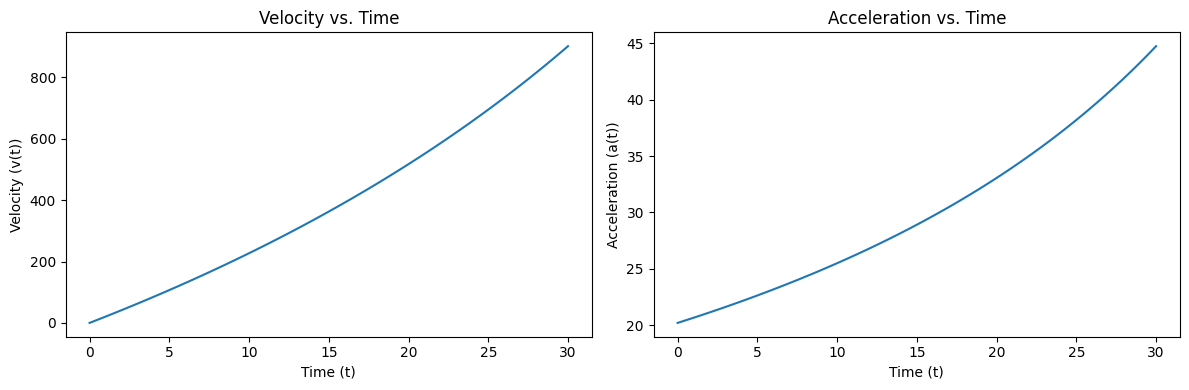

In [2]:
# prompt: Plot v(t) and a(t) from t = 0 to 30 side by side

import matplotlib.pyplot as plt
import numpy as np

# Define the time range
t = np.linspace(0, 30, 100)

# Calculate v(t) and a(t)
vt = v(t)
at = a(t)

# Create subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot v(t)
ax1.plot(t, vt)
ax1.set_xlabel('Time (t)')
ax1.set_ylabel('Velocity (v(t))')
ax1.set_title('Velocity vs. Time')

# Plot a(t)
ax2.plot(t, at)
ax2.set_xlabel('Time (t)')
ax2.set_ylabel('Acceleration (a(t))')
ax2.set_title('Acceleration vs. Time')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

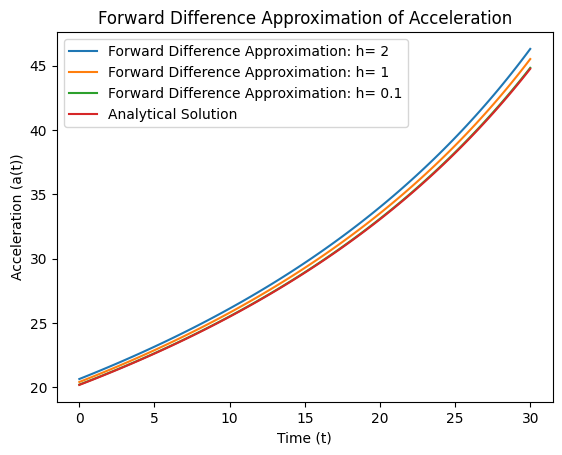

In [3]:
def forward_difference(f, x, h):
  return (f(x + h) - f(x)) / h

a_fd_h2 = forward_difference(v, t, h = 2)
a_fd_h1 = forward_difference(v, t, h = 1)
a_fd_h0p1 = forward_difference(v, t, h = 0.1)

# Plotting the results
plt.plot(t, a_fd_h2, label='Forward Difference Approximation: h= 2')
plt.plot(t, a_fd_h1, label='Forward Difference Approximation: h= 1')
plt.plot(t, a_fd_h0p1, label='Forward Difference Approximation: h= 0.1')
plt.plot(t, a(t), label='Analytical Solution')
plt.xlabel('Time (t)')
plt.ylabel('Acceleration (a(t))')
plt.title('Forward Difference Approximation of Acceleration')
plt.legend()
plt.show()

### Backward difference


By contrast, the *backward difference* steps backwards. Consider replacing $h$ with $-h$,

$$ f(x-h) = f(x) - f'(x) h + O(h^2)$$

and solve for:

$$f'(x) = \frac{f(x)- f(x-h)}{h} +  O(h^2) $$


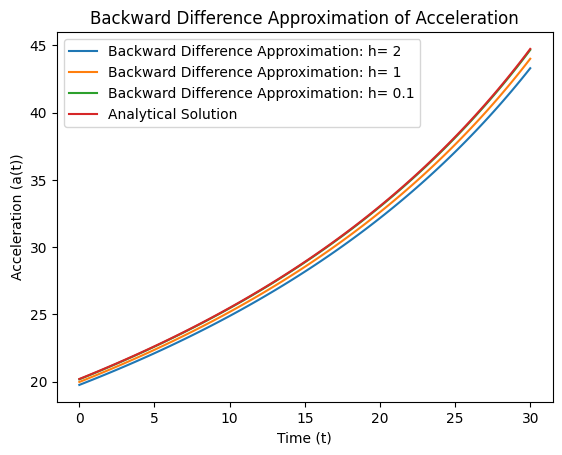

In [4]:
def backward_difference(f, x, h):
  return (f(x)- f(x - h)) / h

a_bd_h2 = backward_difference(v, t, h = 2)
a_bd_h1 = backward_difference(v, t, h = 1)
a_bd_h0p1 = backward_difference(v, t, h = 0.1)

# Plotting the results
plt.plot(t, a_bd_h2, label='Backward Difference Approximation: h= 2')
plt.plot(t, a_bd_h1, label='Backward Difference Approximation: h= 1')
plt.plot(t, a_bd_h0p1, label='Backward Difference Approximation: h= 0.1')
plt.plot(t, a(t), label='Analytical Solution')
plt.xlabel('Time (t)')
plt.ylabel('Acceleration (a(t))')
plt.title('Backward Difference Approximation of Acceleration')
plt.legend()
plt.show()

Note that the approximations are approaching the analytic solution from the other direction.

*Can we combine forward and backward differences to get a better result*?

### Central difference

Let's examine the forward and backward expansions:

$$
\begin{align}
f(x+h) &= f(x) + f'(x) h + f''(x) \frac{h^2}{2} + f'''(x)\frac{h^3}{6} + O(h^4) \\
f(x-h) &= f(x) - f'(x) h + f''(x) \frac{h^2}{2} - f'''(x)\frac{h^3}{6} + O(h^4) \\
\end{align}
$$
and subtract them:
$$
f(x+h)-f(x-h) = 2 f'(x) h + f''' \frac{h^3}{3} + O(h^5)
$$
Note that the even powers of $h$ cancel!

Rearranging this equation leads to the central difference formula:
$$
f'(x) = \frac{f(x+h)-f(x-h)}{2h} + O(h^2)
$$

which is *second order accurate in $h$* since the next correction is $h^2$!

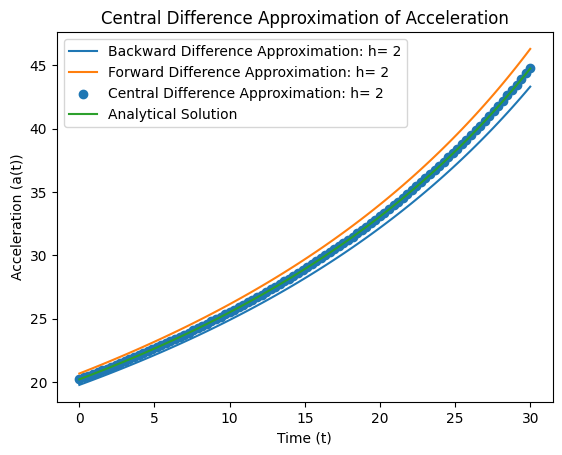

In [5]:
def central_difference(f, x, h):
  return (f(x+h)- f(x - h)) / (2*h)

a_cd_h1 = central_difference(v, t, h = 1)
a_cd_h2 = central_difference(v, t, h = 2)

# Plotting the results
plt.plot(t, a_bd_h2, label='Backward Difference Approximation: h= 2')
plt.plot(t, a_fd_h2, label='Forward Difference Approximation: h= 2')
plt.scatter(t, a_cd_h2, label='Central Difference Approximation: h= 2')
plt.plot(t, a(t), label='Analytical Solution')
plt.xlabel('Time (t)')
plt.ylabel('Acceleration (a(t))')
plt.title('Central Difference Approximation of Acceleration')
plt.legend()
plt.show()

### Comparison

Lets comare the error in forward, backward and central difference for $h=2$:

In [6]:
np.stack([a_fd_h2-a(t), a_bd_h2-a(t), a_cd_h2-a(t)]).T[1:5,:]

array([[ 0.46345415, -0.44519649,  0.00912883],
       [ 0.46776   , -0.44924984,  0.00925508],
       [ 0.47212613, -0.4533588 ,  0.00938366],
       [ 0.47655369, -0.4575244 ,  0.00951465]])

Let's see how it scales with decreasing step size between $h=2$ and $h' = 1$:

In [7]:
np.stack([a_fd_h2-a(t), a_fd_h1-a(t)]).T[1:5,:]

array([[0.46345415, 0.22936654],
       [0.46776   , 0.23148645],
       [0.47212613, 0.23363589],
       [0.47655369, 0.2358154 ]])

In [8]:
np.stack([a_bd_h2-a(t), a_bd_h1-a(t)]).T[1:5,:]

array([[-0.44519649, -0.22480399],
       [-0.44924984, -0.22686082],
       [-0.4533588 , -0.22894601],
       [-0.4575244 , -0.23106008]])

Note the error roughly cuts in half; $Error \sim \frac{h}{h'}$. Now take a look at the central difference:

In [9]:
np.stack([a_cd_h2-a(t), a_cd_h1-a(t)]).T[1:5,:]

array([[0.00912883, 0.00228127],
       [0.00925508, 0.00231281],
       [0.00938366, 0.00234494],
       [0.00951465, 0.00237766]])

See how it reduces by a factor of 4: $Error \sim \bigg[\frac{h}{h'}\bigg]^2$

The central difference algorithm:
* finds a more accurate solution in the same number of function calls.
* becomes more accurate with step size quadratically.
* requires information both before and after the point (which can be a problem at boundaries).

## Higher order derivatives

We can similarly derive higher order derivatives in forward, backward, and central approximations.

Once obtained, we can also use the second order derivative to improve the first order derivatives!

## Forward difference (second order)

Consider the Taylor expansion:
$$
f(x+2h) = f(x)+ 2 f'(x) h + f''(x)\frac{4 h^2}{2} +O(h^3)
$$

and recall:

$$
f(x+h) = f(x)+ f'(x) h + f''(x)\frac{h^2}{2} +O(h^3)
$$

Subtracting twice the second from the first we get:

$$
\begin{align}
f(x+2h)-2 f(x+h) &= -f(x) + f''(x) h^2 +O(h^3)
\end{align}
$$

and we get the forward approximation of the second derivative:
$$
f''(x) = \frac{f(x+2h)-2 f(x+h) + f(x)}{h^2} +O(h)
$$




###Alternative derivation

Note we could also arrive at this considering the 1st derivative of the 1st derivatives:
$$ \begin{align}
f'(x) &= \frac{f(x+h) - f(x)}{h} \\
f'(x+h) &= \frac{f(x+2h) - f(x+h)}{h} \\
\end{align}
$$
and therefore,
$$
\begin{align}
f''(x) &= \frac{f'(x+h) - f'(x)}{h} \\
 &= \frac{f(x+2h) - 2 f(x+h) + f(x)}{h^2}
\end{align}
$$


which lends itself to a recursive program.

### A more accurate first derivative

We can now revisit the approximation of $f'(x)$ and use our approximation of $f''(x)$ to improve it!

*Be careful to watch the $h$'s in the following*



$$
\begin{align}
f(x+h) &= f(x) + f'(x) h + f''(x) \frac{h^2}{2} + O(h^3) \\
&= f(x) + f'(x) h + \frac{f(x+2h)-2 f(x+h) + f(x)}{h^2} \frac{h^2}{2}+ O(h^3)
\end{align}
$$

Collecting terms we reach
$$
f'(x) = \frac{-f(x+2h) + 4f(x+h) -3 f(x)}{2h} + O(h^2)
$$


This is a nice result, but notice that we now need to do three function calls to achieve the same accuracy as the central difference (2 function calls).

The general formula for $n$th order forward derivatives is:
$$f^n(x) = \sum_{i=0}^n(-1)^{n-i} {n \choose i} f(x+ih) $$

which one could use to successively improve the previous derivatives.

#### Example: Compare the error for the improved forward difference method

In [10]:
# prompt: generate a function for the second order accurate forward difference formula

def forward_difference_2(f, x, h):
  return (-f(x + 2 * h) + 4 * f(x + h) - 3 * f(x)) / (2 * h)

a_fd2_h2 = forward_difference_2(v, t, h = 2)
a_fd2_h1 = forward_difference_2(v, t, h = 1)

np.stack([a_fd_h2-a(t), a_fd2_h2-a(t), a_fd2_h1-a(t), a_cd_h2-a(t)]).T[1:5,:]

array([[ 0.46345415, -0.01955861, -0.00472106,  0.00912883],
       [ 0.46776   , -0.01983546, -0.00478709,  0.00925508],
       [ 0.47212613, -0.02011757, -0.00485436,  0.00938366],
       [ 0.47655369, -0.02040504, -0.00492289,  0.00951465]])

## Backward difference (second order)


Following a similar derivation, the backward second derivative,
$$
f''(x) = \frac{f(x)- 2 f(x-h) + f(x-2h)}{h^2} +O(h)
$$
and *second order accurate first derivative*,

$$
f'(x) = \frac{3 f(x) - 4f(x+h) -f(x-2h)}{2h} + O(h^2)
$$

and generally,
$$f'(x) = \sum_{i=0}^n(-1)^{i} {n \choose i} f(x-ih) $$





## Central difference

Finally, subtracting hte forward and backward derivatives gives the central difference:

$$
f''(x) = \frac{f(x+h) - 2 f(x) + f(x-h)}{h^2} +O(h^2)
$$
and the second order accurate first derivative,

$$
f'(x) = \frac{-f(x+2h)+8f(x+h)-8f(x-h)+f(x-2h)}{12h} + O(h^4)
$$
and generally,
$$f'(x) = \sum_{i=0}^n(-1)^{i} {n \choose i} f\bigg(x+\bigg[\frac{n}{2}-1\bigg]h\bigg) $$

## Summary




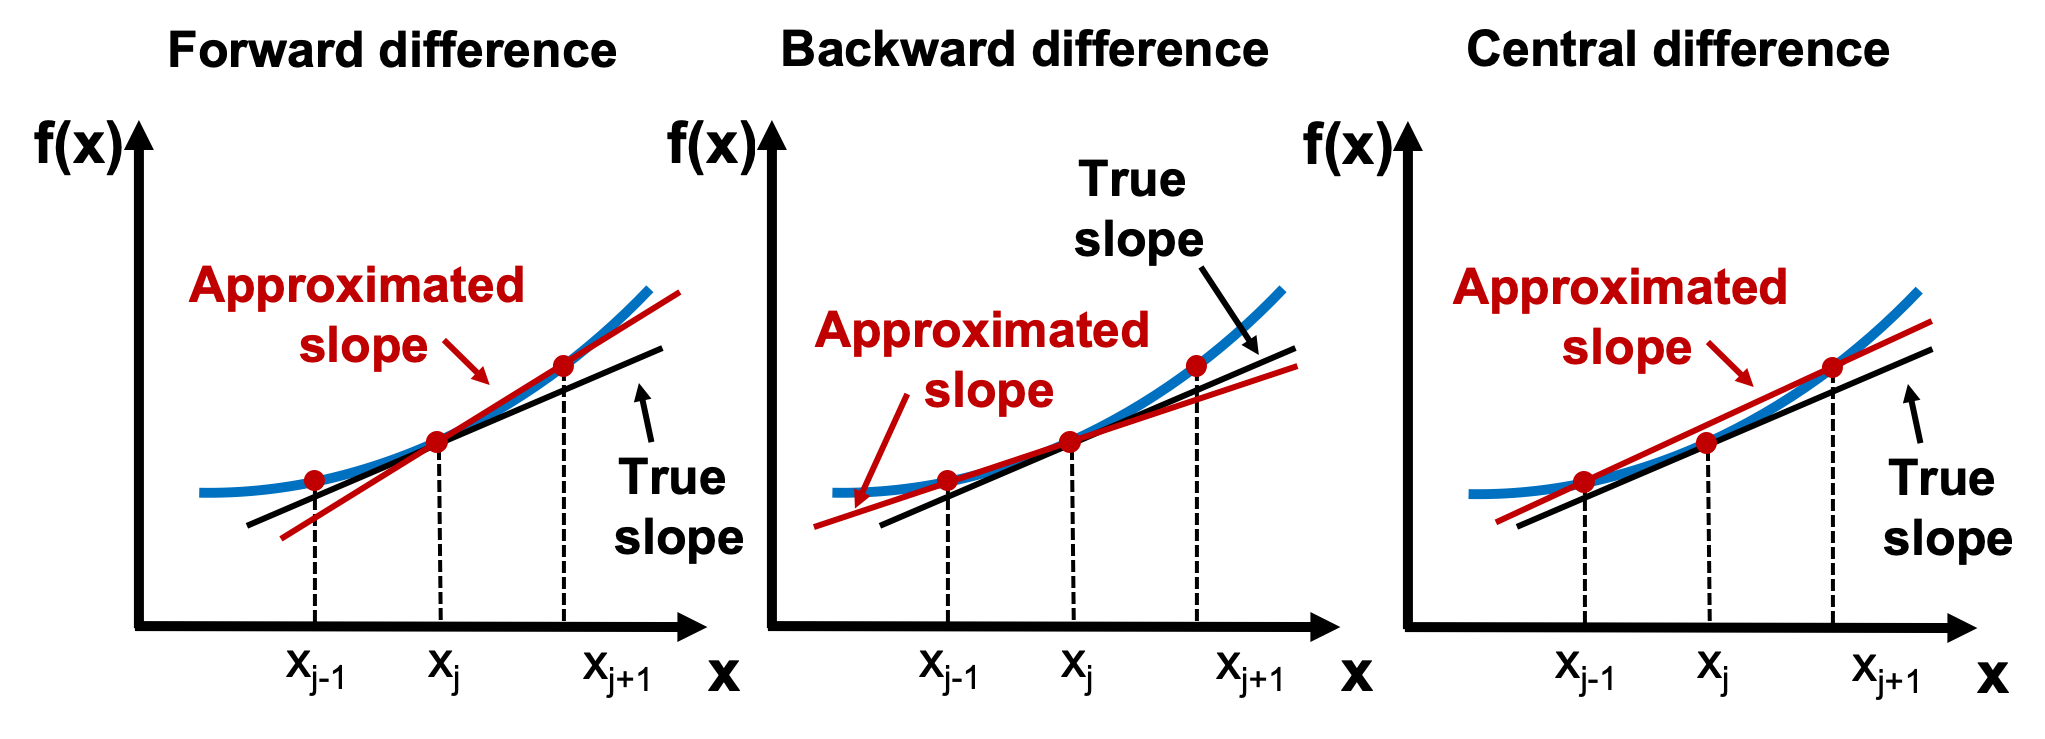

The accuracy of the approximaiton can be improved in two ways:
1.   Decrese step size
2.   Use approximated higher order derivatives to *correct* lower order derivatives, but this involves increasing numbers of function calls.

As tempting as 2) is, decresing step size is usually the better approach.

#Discrete data

Numerical methods are often applied to discrete data (or a *discretized function*).

## Evenly spaced data

As long as this data is evenly spaced with step size $h$, we can use finite difference directly.

BUT: Be aware of the boundaries! The central difference is the superior choice for the interior points, but you will need forward and backward differences at the boundaries.

#### Example: Find the derivative of a discretized function

Say we have data for a function $y(x)$ that looks like a parabola. We measured it every $h$ steps in the range [a,b], so we have data for $x_0 = a$ to $x_n = b$

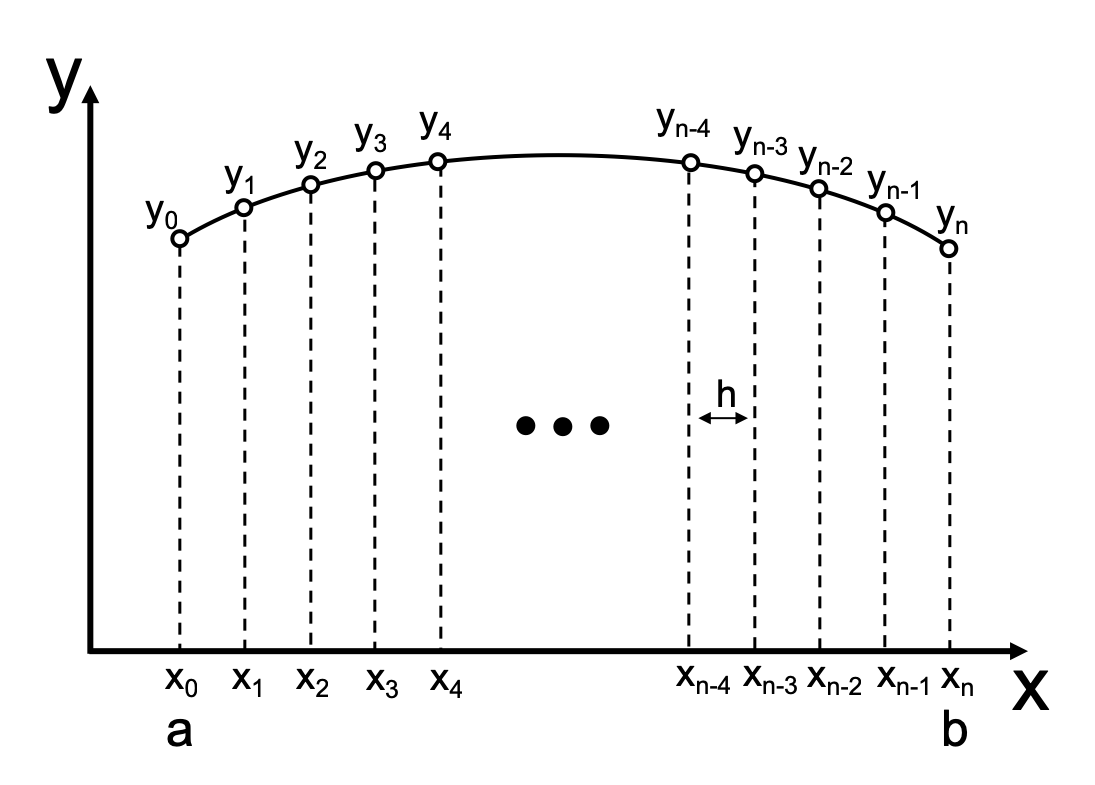

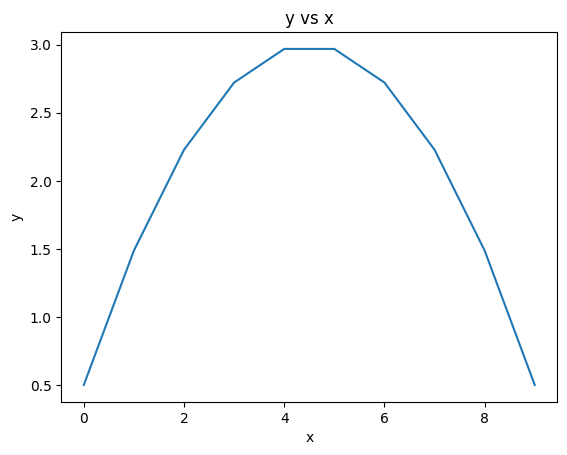

In [11]:
x = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([0.5, 1.48765432, 2.22839506, 2.72222222, 2.9691358, 2.9691358,
 2.72222222, 2.22839506, 1.48765432, 0.5 ])

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('y vs x')
plt.show()

If we just applied central difference to this function would encounter problems at the endpoints.

The numpy function *gradient* identifies the endpoints and treats them with forward / backward difference:

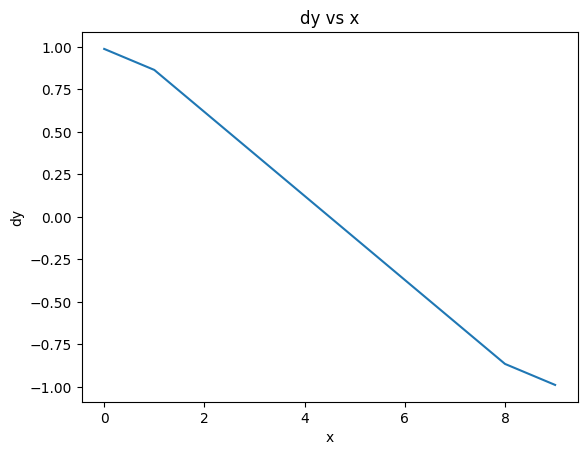

In [12]:
dy = np.gradient(y,x)

plt.plot(x, dy)
plt.xlabel('x')
plt.ylabel('dy')
plt.title('dy vs x')
plt.show()

This looks good in the middle but the ends are funny...

What do you think?

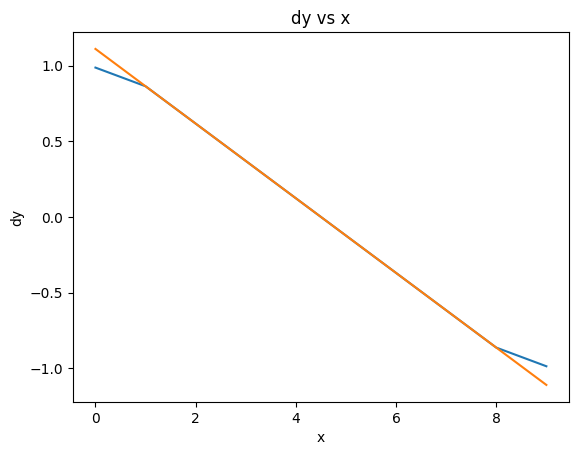

In [13]:
dy2 = np.gradient(y,x, edge_order = 2)

plt.plot(x, dy)
plt.plot(x, dy2)
plt.xlabel('x')
plt.ylabel('dy')
plt.title('dy vs x')
plt.show()

Bingo! Using the higher order edge cases solved the problem!

Note, this is the foundation of the finite difference method for solving differential equations.

## Unevenly spaced data

When data is unevenly spaced we can always do first-order forward / backward difference. If we want higher order generally have to resort to a local polynomial fitting.

Recall the cubic Lagrange interpolation. We can take the (analytic) derivative and find:

$$
f'(x) = f(x_{i-1}) \frac{2x - x_i-x_{i+1}}{(x_{i-1}-x_i) (x_{i-1}-x_{i+1})} +f(x_{i}) \frac{2x - x_{i-1}-x_{i+1}}{(x_{i}-x_{i-1}) (x_{i}-x_{i+1})} + f(x_{i+1}) \frac{2x - x_{i-1}-x_{i}}{(x_{i+1}-x_{i-1}) (x_{i+1}-x_{i})} $$

which is of comparable accuracy to the centeral difference and recovers it if the points are equally spaced.

### Uncertainty

Let's see what happens when we introduce error into our data.

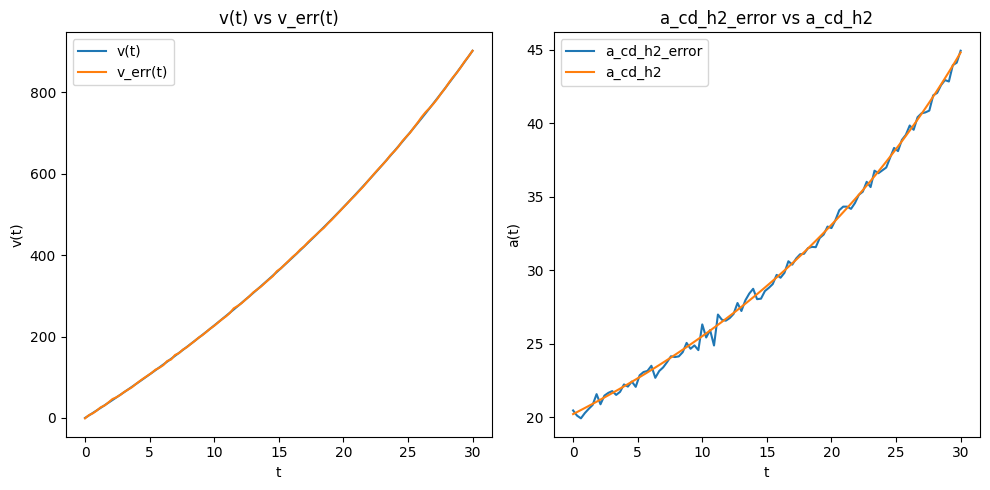

In [14]:
# prompt: Plot beside v and v_err and another plot with a_cd_h2_error and a_cd_h2  beside eachother

def v_err(t):
  return v(t)+np.random.normal(0,1, len(t))

a_cd_h2_error = central_difference(v_err, t, h=2)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))


# Plot v and v_err
axes[0].plot(t, v(t), label='v(t)')
axes[0].plot(t, v_err(t), label='v_err(t)')
axes[0].set_xlabel('t')
axes[0].set_ylabel('v(t)')
axes[0].set_title('v(t) vs v_err(t)')
axes[0].legend()


# Plot a_cd_h2_error and a_cd_h2
axes[1].plot(t, a_cd_h2_error, label='a_cd_h2_error')
axes[1].plot(t, a_cd_h2, label='a_cd_h2')
axes[1].set_xlabel('t')
axes[1].set_ylabel('a(t)')
axes[1].set_title('a_cd_h2_error vs a_cd_h2')
axes[1].legend()

plt.tight_layout()
plt.show()

Yikes! This is because differentiation tends to *amplify* error.

Consider a Fourier analysis of the signal and you'll see that the noise has a period on the order of the order of the sampling distance (which is much higher frequency than the signal). This means the noise has a much larger derivative!



<ipython-input-15-8f59ff1ddeb7>:11: RuntimeWarning: divide by zero encountered in divide
  plt.plot(1/frequencies, np.abs(fft_result))


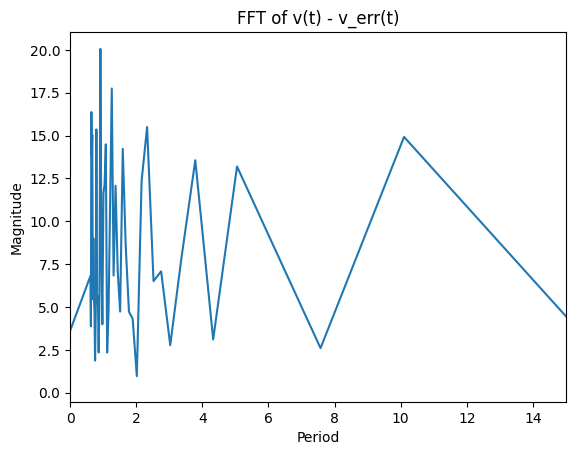

In [15]:
# prompt: show the fft of v(t)-v_err(t) and show in period

# Calculate the difference between v(t) and v_err(t)
difference = v(t) - v_err(t)

# Perform FFT
fft_result = np.fft.fft(difference)
frequencies = np.fft.fftfreq(len(difference), d=(t[1]-t[0]))

# Plot the FFT in terms of period
plt.plot(1/frequencies, np.abs(fft_result))
plt.xlabel('Period')
plt.ylabel('Magnitude')
plt.title('FFT of v(t) - v_err(t)')
plt.xlim(0, 15)  # Adjust x-axis limits as needed
plt.show()

With this in mind, there are several options:
* Prefilter the data: Apply a moving average, or low-pass filter to reduce high-frequency noise
* Regularization of the derivative: By requiring smoothness of the derivative, we can *damp* out frenetic behaviour.
* Savitzky-Golay Filter: Use linear least squares to fit a low-degree polynomial to successive windows and take that derivative
* integrate instead.

Just as derivation amplifies noise, integration tends to smooth it. So a common approach is to integrate a noisy signal and fit the integral to some expected form.

# Higher dimensions

Finite difference generalizes readily to multiple dimensions, by computing the elements of the gradient individually:

$$
\frac{\partial f}{\partial x_i} ≈ \frac{f(x + heᵢ) - f(x - heᵢ)} {2h} $$

Boundary cases are handelled similarly but with the bounded dimension calculated by forward / backward difference.


In [16]:
# prompt: Give me an example of an ugly 2D function, plot it as a surface in plotly and show its gradients in arrows

import numpy as np
import plotly.graph_objects as go
import plotly.figure_factory as ff

# Define the function
def ugly_function(x, y):
  return (np.sin(x) * np.cos(y) + np.cos(x) * np.sin(y)) * np.exp(-(x**2 + y**2) / 10)

# Create a grid of x and y values
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x, y)

# Calculate the function values and gradients
Z = ugly_function(X, Y)
dZdx, dZdy = np.gradient(Z)

# Create the surface plot
fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y)])
fig.update_layout(title='Ugly 2D Function', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

# Add gradient arrows to the plot
arrow_x = X[::5, ::5].flatten()
arrow_y = Y[::5, ::5].flatten()
arrow_z = Z[::5, ::5].flatten()
arrow_u = dZdx[::5, ::5].flatten()
arrow_v = dZdy[::5, ::5].flatten()


fig.add_trace(go.Cone(
    x=arrow_x,
    y=arrow_y,
    z=arrow_z,
    u=arrow_u,
    v=arrow_v,
    w=np.zeros_like(arrow_u),
    sizemode="absolute",
    sizeref=0.1,
    showscale=False,
    colorscale='Blues'
))

fig.show()
